In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [3]:
DATA_DIR = "../../data/processed/"
INPUT_FILE_NAME = 'final_squash15_with_pos_ner_tm.parquet'
df = pd.read_parquet(DATA_DIR + INPUT_FILE_NAME)

In [10]:
df

,speaker,headline,description,duration,tags,transcript,WC,clean_transcript,clean_transcript_string,sim_tags,squash15_tags,pos_sequence,ner_sequence,tm
0,Al Gore,Averting the climate crisis,With the same humor and humanity he exuded in ...,0:16:17,"cars,alternative energy,culture,politics,scien...","0:14\r\r\rThank you so much, Chris.\rAnd it's ...",2281.0,"b'[""thank"", ""chris"", ""truly"", ""great"", ""honor""...",thank chris truly great honor opportunity come...,"cars,solar system,energy,culture,politics,scie...","culture,politics,science,global issues,technology",VERB PROPN ADV ADJ NOUN NOUN VERB NOUN ADV ADV...,PERSON ORG ORG GPE LOC ORG PRODUCT GPE GPE PER...,"[0.04325945698517057, 0.0, 0.00142482934694180..."
1,Amy Smith,Simple designs to save a life,Fumes from indoor cooking fires kill more than...,0:15:06,"MacArthur grant,simplicity,industrial design,a...","0:11\r\r\rIn terms of invention,\rI'd like to ...",2687.0,"b'[""term"", ""invention"", ""like"", ""tell"", ""tale""...",term invention like tell tale favorite project...,"macarthur grant,simplicity,design,solar system...","design,global issues",NOUN NOUN SCONJ VERB PROPN ADJ NOUN VERB NOUN ...,GPE DATE CARDINAL DATE ORG PERSON LOC ORG GPE ...,"[0.013287880838036227, 0.0, 0.0, 0.00511725094..."
2,Ashraf Ghani,How to rebuild a broken state,Ashraf Ghani's passionate and powerful 10-minu...,0:18:45,"corruption,poverty,economics,investment,milita...","0:12\r\r\rA public, Dewey long ago observed,\r...",2506.0,"b'[""public"", ""dewey"", ""long"", ""ago"", ""observe""...",public dewey long ago observe constitute discu...,"corruption,inequality,science,investment,war,c...","science,culture,politics,global issues,business",ADJ PROPN ADV ADV VERB ADJ NOUN NOUN PROPN PRO...,DATE NORP ORDINAL DATE MONEY DATE DATE DATE EV...,"[0.0, 0.006699599134802422, 0.0, 0.00564851883..."
3,Burt Rutan,The real future of space exploration,"In this passionate talk, legendary spacecraft ...",0:19:37,"aircraft,flight,industrial design,NASA,rocket ...","0:11\r\r\rI want to start off by saying, Houst...",3092.0,"b'[""want"", ""start"", ""say"", ""houston"", ""problem...",want start say houston problem enter second ge...,"flight,design,nasa,science,invention,entrepren...","design,science,business",VERB NOUN VERB PROPN NOUN VERB ADJ NOUN NOUN N...,GPE ORDINAL ORG PERSON DATE DATE DATE TIME PER...,"[0.040282108339079505, 0.03732895646484358, 0...."
4,Chris Bangle,Great cars are great art,American designer Chris Bangle explains his ph...,0:20:04,"cars,industrial design,transportation,inventio...","0:12\r\r\rWhat I want to talk about is, as bac...",3781.0,"b'[""want"", ""talk"", ""background"", ""idea"", ""car""...",want talk background idea car art actually mea...,"cars,design,transportation,invention,technolog...","design,technology,business,science",VERB NOUN NOUN NOUN NOUN NOUN ADV ADJ NOUN NOU...,PERSON PRODUCT ORG ORG PERSON PERSON PERSON OR...,"[0.08049208168957463, 0.0, 0.0, 0.008031187136..."
5,Craig Venter,Sampling the ocean's DNA,Genomics pioneer Craig Venter takes a break fr...,0:16:51,"biotech,invention,oceans,genetics,DNA,biology,...","0:11\r\r\rAt the break, I was asked by several...",2548.0,"b'[""break"", ""ask"", ""people"", ""comment"", ""age"",...",break ask people comment age debate comment un...,"biotech,invention,oceans,biomechanics,science,...","biomechanics,science,biodiversity,technology",VERB VERB NOUN VERB NOUN NOUN NOUN VERB NOUN A...,DATE DATE ORG DATE DATE PERSON ORG CARDINAL CA...,"[0.0, 0.01122282724927712, 0.0, 0.163765591818..."
6,David Pogue,Simplicity sells,New York Times columnist David Pogue takes aim...,0:21:26,"simplicity,computers,software,interface design...","0:12\r\r\r(Music: ""The Sound of Silence,""\rSim...",3584.0,"b'[""music"", ""sound"", ""silence"", ""simon"", ""garf...",music sound silence simon garfunkel hello voic...,"simplicity,computers,software,design,music,med...","design,media,entertainment,science,technology",NOUN PROPN PROPN PROPN PROPN INTJ N

In [31]:
def focus_tag(x,tag,other):
    if tag in x and other not in x:
        return tag
    else:
        return ""

In [58]:
tag1 = 'biodiversity'
tag2 = 'history'
focus_list = [tag1,tag2]

In [59]:
df1 = df.copy()
df1['squash15_tags'] = df1['squash15_tags'].map(lambda x: focus_tag(x,tag1,tag2))
df1 = df1[df1['squash15_tags']!=""]
df1

,speaker,headline,description,duration,tags,transcript,WC,clean_transcript,clean_transcript_string,sim_tags,squash15_tags,pos_sequence,ner_sequence,tm
5,Craig Venter,Sampling the ocean's DNA,Genomics pioneer Craig Venter takes a break fr...,0:16:51,"biotech,invention,oceans,genetics,DNA,biology,...","0:11\r\r\rAt the break, I was asked by several...",2548.0,"b'[""break"", ""ask"", ""people"", ""comment"", ""age"",...",break ask people comment age debate comment un...,"biotech,invention,oceans,biomechanics,science,...",biodiversity,VERB VERB NOUN VERB NOUN NOUN NOUN VERB NOUN A...,DATE DATE ORG DATE DATE PERSON ORG CARDINAL CA...,"[0.0, 0.01122282724927712, 0.0, 0.163765591818..."
23,Ross Lovegrove,"Organic design, inspired by nature",Designer Ross Lovegrove expounds his philosoph...,0:19:30,"industrial design,invention,product design,sci...",0:11\r\r\rMy name is Lovegrove.\rI only know n...,3472.0,"b'[""lovegrove"", ""know"", ""lovegroves"", ""parent""...",lovegrove know lovegroves parent cousin know h...,"design,invention,science,dna,biomechanics,biod...",biodiversity,VERB VERB NOUN NOUN NOUN VERB VERB VERB ADV AD...,DATE TIME ORG PERSON DATE PERSON PERSON ORG DA...,"[0.05046730159068269, 0.008620141121501114, 0...."
72,Sheila Patek,The shrimp with a kick!,Biologist Sheila Patek talks about her work me...,0:16:25,"online video,oceans,biology,biomechanics,scien...",0:11\r\r\rIf you'd like to learn how to play t...,3036.0,"b'[""like"", ""learn"", ""play"", ""lobster"", ""joke"",...",like learn play lobster joke come play lobster...,"online video,oceans,biomechanics,biodiversity,...",biodiversity,INTJ VERB VERB NOUN NOUN VERB VERB NOUN ADV VE...,DATE GPE NORP DATE PERSON ORG PERSON ORDINAL O...,"[0.008512908309343982, 0.007590306930852853, 0..."
78,E.O. Wilson,My wish: Build the Encyclopedia of Life,"As E.O. Wilson accepts his 2007 TED Prize, he ...",0:22:35,"ants,TED Prize,insects,biology,science,nature,...","0:12\r\r\rI have all my life wondered what ""mi...",2348.0,"b'[""life"", ""wonder"", ""mindboggling"", ""mean"", ""...",life wonder mindboggling mean day declare bogg...,"insects,biomechanics,biodiversity,science,natu...",biodiversity,NOUN NOUN VERB PROPN PROPN PROPN PROPN ADV VER...,NORP DATE ORG ORG LOC GPE DATE CARDINAL CARDIN...,"[0.0, 0.03500549243619573, 0.0, 0.058769416423..."
113,Tierney Thys,Swim with the giant sunfish,Marine biologist Tierney Thys asks us to step ...,0:16:41,"oceans,fish,science,climate change,environment...",0:11\r\r\rI'd like to start tonight by somethi...,2693.0,"b'[""like"", ""start"", ""tonight"", ""completely"", ""...",like start tonight completely different ask jo...,"oceans,fish,science,culture,global issues,envi...",biodiversity,SCONJ VERB NOUN ADV ADJ PROPN PROPN PROPN PROP...,TIME TIME PERSON NORP NORP DATE PERSON CARDINA...,"[0.014737058354733271, 0.0, 0.0, 0.0, 0.0, 0.1..."
125,Deborah Gordon,The emergent genius of ant colonies,Deborah Gordon studies ant colonies in the Ari...,0:20:31,"ants,insects,biology,science,design,collaboration","0:12\r\r\rI study ants, and that's because I l...",3648.0,"b'[""study"", ""ant"", ""like"", ""think"", ""organizat...",study ant like think organization work particu...,"insects,biomechanics,biodiversity,science,desi...",biodiversity,PROPN PROPN INTJ VERB PROPN NOUN ADJ ADJ NOUN ...,GPE DATE CARDINAL DATE DATE DATE CARDINAL CARD...,"[0.008909855402684179, 0.0026044723127371817, ..."
164,Juan Enriquez,Using biology to rethink the energy challenge,Juan Enriquez challenges our definition of bio...,0:18:10,"TED Brain Trust,biotech,energy,science,biodive...",0:11\r\r\rWhat is bioenergy? Bioenergy is not ...,2930.0,"b'[""bioenergy"", ""bioenergy"", ""ethanol"", ""bioen...",bioenergy bioenergy ethanol bioenergy global w...,"biotech,energy,science,biodiversity,technology...",biodiversity,PROPN PROPN PROPN PROPN ADJ ADJ PROPN PROPN NO...,PERSON ORG DATE PERSON WORK_OF_ART GPE GPE GPE...,"[0.015611531950280018, 0.002888395503554672, 0..."
198,Jill Bolte Taylor,

In [60]:
df2 = df.copy()
df2['squash15_tags'] = df2['squash15_tags'].map(lambda x: focus_tag(x,tag2,tag1))
df2 = df2[df2['squash15_tags']!=""]
df2

,speaker,headline,description,duration,tags,transcript,WC,clean_transcript,clean_transcript_string,sim_tags,squash15_tags,pos_sequence,ner_sequence,tm
14,Helen Fisher,"Why we love, why we cheat",Anthropologist Helen Fisher takes on a tricky ...,0:23:27,"love,gender,relationships,cognitive science,ps...",0:11\r\r\rI'd like to talk today\rabout the tw...,3827.0,"b'[""like"", ""talk"", ""today"", ""big"", ""social"", ""...",like talk today big social trend come century ...,"love,gender,relationships,science,history,culture",history,SCONJ NOUN NOUN ADJ ADJ NOUN VERB NOUN NOUN VE...,DATE DATE PERSON GPE PERSON PERSON PERSON PERS...,"[0.04767230505808768, 0.0, 0.0, 0.0, 0.0151999..."
16,Kevin Kelly,How technology evolves,"Tech enthusiast Kevin Kelly asks ""What does te...",0:20:00,"philosophy,evolution,culture,choice,history,sc...","0:11\r\r\rI don't know about you, but I haven'...",3379.0,"b'[""know"", ""figure"", ""exactly"", ""technology"", ...",know figure exactly technology mean life spend...,"science,history,culture,choice,future,technology",history,VERB NOUN ADV NOUN ADJ NOUN VERB ADJ NOUN VERB...,DATE DATE DATE PERSON PERSON TIME PERSON PERSO...,"[0.03079442054798949, 0.033779253241753265, 0...."
31,James Watson,How we discovered DNA,Nobel laureate James Watson opens TED2005 with...,0:20:11,"invention,genetics,DNA,culture,history,science...","0:11\r\r\rWell, I thought there would be a pod...",3175.0,"b'[""think"", ""podium"", ""bite"", ""scar"", ""chris"",...",think podium bite scar chris ask tell structur...,"invention,biomechanics,science,dna,culture,his...",history,VERB PROPN PROPN PROPN PROPN PROPN VERB NOUN N...,PERSON DATE GPE ORG NORP NORP NORP DATE PERSON...,"[0.05751740581749149, 0.005292275203001959, 0...."
36,Frans Lanting,The story of life in photographs,"In this stunning slideshow, celebrated nature ...",0:16:17,"photography,evolution,fish,animals,nature,desi...",0:15\r\r\rNature's my muse and it's been my pa...,1135.0,"b'[""nature"", ""muse"", ""passion"", ""photographer""...",nature muse passion photographer national geog...,"science,history,fish,animals,nature,design,sto...",history,PROPN PROPN NOUN PROPN PROPN PROPN PROPN NOUN ...,DATE DATE PERSON DATE DATE DATE PERSON ORG ORG...,"[0.0050072547317069, 0.04797087603732334, 0.00..."
55,Anna Deavere Smith,Four American characters,Writer and actor Anna Deavere Smith gives life...,0:23:05,"MacArthur grant,sports,race,performance art,th...",0:11\r\r\rSo my grandfather told me when I was...,3766.0,"b'[""grandfather"", ""tell"", ""little"", ""girl"", ""w...",grandfather tell little girl word grow segrega...,"macarthur grant,sports,race,science,theater,in...",history,NOUN VERB ADJ NOUN NOUN VERB PROPN PROPN PROPN...,GPE GPE GPE GPE PERSON PERSON DATE CARDINAL NO...,"[0.10489863473711415, 0.0, 0.0, 0.001330272664..."
56,Steven Johnson,"How the ""ghost map"" helped end a killer disease",Author Steven Johnson takes us on a 10-minute ...,0:10:03,"map,disease,health,culture,history,science,cit...","0:11\r\r\rIf you haven't ordered yet, I genera...",1853.0,"b'[""order"", ""generally"", ""rigatoni"", ""spicy"", ...",order generally rigatoni spicy tomato sauce go...,"map,science,culture,history,cities,urban plann...",history,NOUN ADV VERB PROPN PROPN NOUN VERB ADJ NOUN A...,PERSON PERSON GPE TIME DATE GPE GPE NORP PERSO...,"[0.027562994576505462, 0.0, 0.0, 0.0, 0.010174..."
88,Dan Dennett,Let's teach religion -- all religion -- in sch...,Philosopher Dan Dennett calls for religion -- ...,0:24:45,"atheism,TED Brain Trust,consciousness,God,phil...",0:13\r\r\rIt's wonderful to be back.\rI love t...,3685.0,"b'[""wonderful"", ""love"", ""wonderful"", ""gather"",...",wonderful love wonderful gather wonder earth w...,"buddhism,religion,consciousness,god,science,hi...",history,ADJ NOUN ADJ NOUN NOUN NOUN ADJ NOUN VERB ADJ ...,PERSON DATE DATE ORG PERSON DATE PERSON DATE D...,"[0.05937017647780123, 0.02075197421659465, 0.0..."
90,Dan Gilbert,The surprising science of happiness,"Dan Gi

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
#                         min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 
vectorizer2 = TfidfVectorizer(stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1), # considering only 1-grams
#                         min_df = 0.05,     # cut words present in less than 5% of documents
                        max_df = 0.3)      # cut words present in more than 30% of documents 

t0 = time()

tfidf1 = vectorizer1.fit_transform(df1['transcript'])
tfidf2 = vectorizer2.fit_transform(df2['transcript'])
print("done in %0.3fs." % (time() - t0))
print(tfidf1)

done in 3.200s.
  (0, 1963)	0.038113282650583294
  (0, 1054)	0.03265328117033682
  (0, 2973)	0.035524448528205285
  (0, 551)	0.0244094528710982
  (0, 3814)	0.02836147185558926
  (0, 2971)	0.029550212480194328
  (0, 10092)	0.035524448528205285
  (0, 6534)	0.02836147185558926
  (0, 10201)	0.035524448528205285
  (0, 10656)	0.035524448528205285
  (0, 168)	0.014537306218399921
  (0, 9264)	0.01567409419882904
  (0, 14323)	0.0244094528710982
  (0, 11745)	0.04477447161515661
  (0, 6253)	0.0639688286380766
  (0, 2858)	0.09400460699536858
  (0, 13742)	0.05143566057972992
  (0, 1495)	0.014537306218399921
  (0, 16074)	0.020511542266410877
  (0, 9400)	0.019056641325291647
  (0, 11477)	0.01960029127888874
  (0, 12941)	0.10422987846030068
  (0, 6032)	0.017246476198482175
  (0, 10125)	0.11280552839444231
  (0, 6662)	0.06576161392496196
  :	:
  (169, 7848)	0.03238630786100322
  (169, 6168)	0.03434555850626566
  (169, 15234)	0.03238630786100322
  (169, 360)	0.4210220021930419
  (169, 7645)	0.03238630786

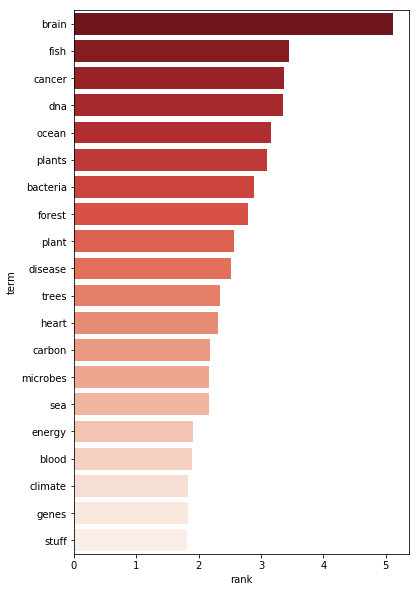

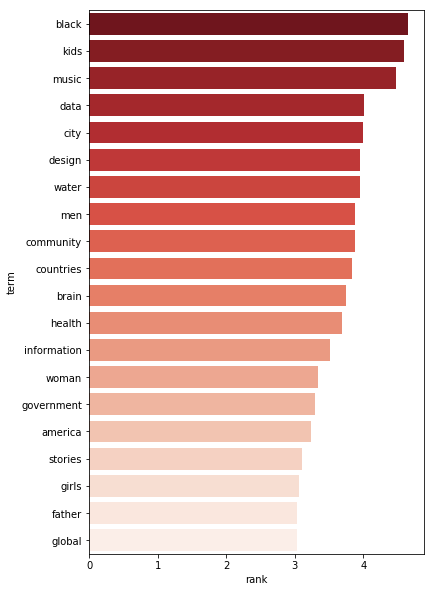

In [62]:
# Let's make a function to call the top ranked words in a vectorizer
def rank_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','rank']).sort_values('rank', ascending=False)
    return ranked

ranked1 = rank_words(terms=vectorizer1.get_feature_names(), feature_matrix=tfidf1)
ranked2 = rank_words(terms=vectorizer2.get_feature_names(), feature_matrix=tfidf2)

fig1, ax1 = plt.subplots(figsize=(6,10), ncols=1, nrows=1)
sns.barplot(x='rank',y='term',data=ranked1[:20], palette='Reds_r', ax=ax1);

fig2, ax2 = plt.subplots(figsize=(6,10), ncols=1, nrows=1)
sns.barplot(x='rank',y='term',data=ranked2[:20], palette='Reds_r', ax=ax2);

In [66]:
# Let's visualize a word cloud with the frequencies obtained by idf transformation
def word_cloud(ranked,name):
    dic = {ranked.loc[i,'term'].upper(): ranked.loc[i,'rank'] for i in range(0,len(ranked))}

    from wordcloud import WordCloud
    wordcloud = WordCloud(background_color='white',
                          max_words=100,
                          colormap='Reds').generate_from_frequencies(dic)
    fig = plt.figure(1,figsize=(12,15))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.savefig(name)
    plt.show()

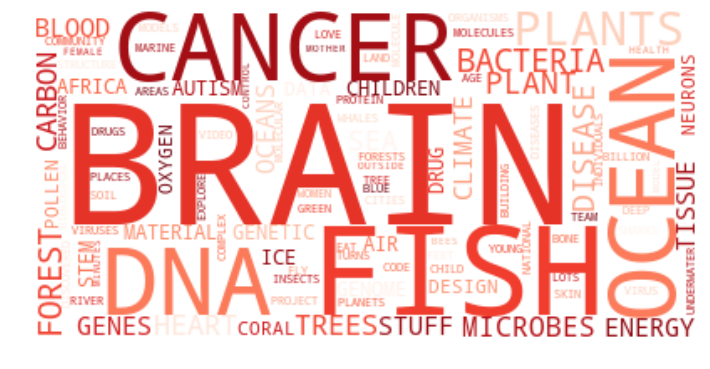

In [68]:
word_cloud(ranked1,tag1+'_wordcloud.png')

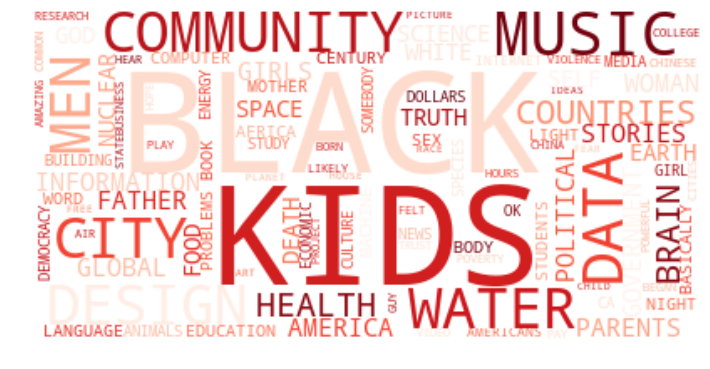

In [70]:
word_cloud(ranked2,tag2+'_wordcloud.png')